<a href="https://colab.research.google.com/github/Vishwanathamrish/Kidney-Stone-Removal-Prediction/blob/main/kidney_stone_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('kidney_stone_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kidney_stone_data.csv')
df.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


In [ ]:
df.isnull().sum()

treatment     0
stone_size    0
success       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

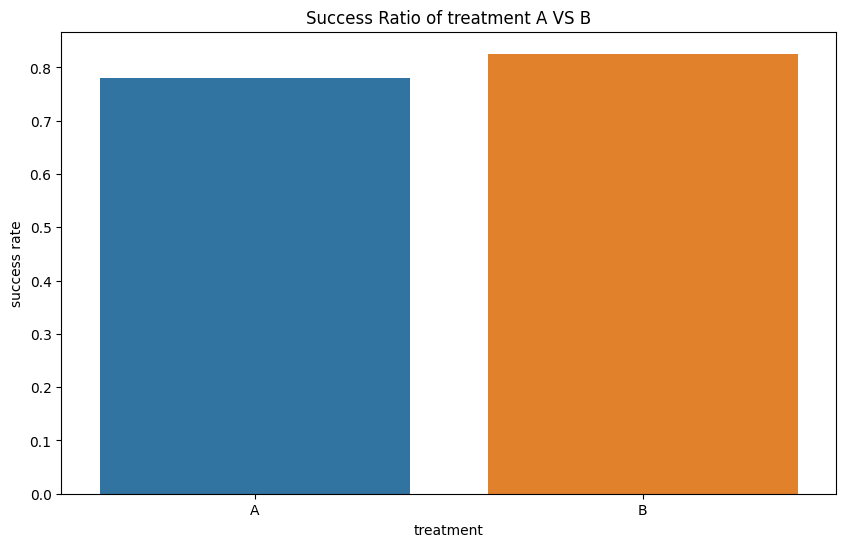

In [ ]:
success_rate = df.groupby('treatment')['success'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.xlabel('treatment')
plt.ylabel('success rate')
plt.title('Success Ratio of treatment A VS B')
plt.show()

<Figure size 800x600 with 0 Axes>

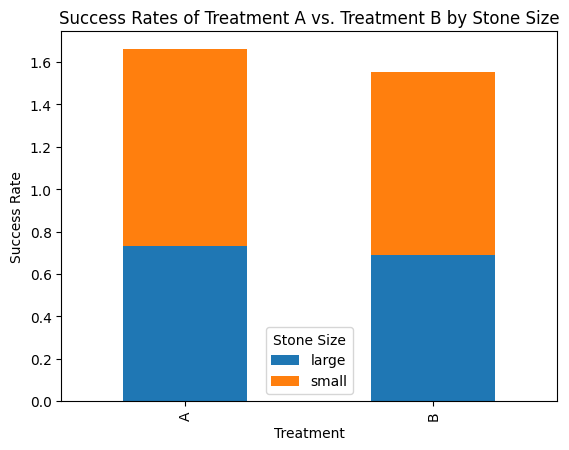

In [ ]:
success_rates_by_size = df.groupby(['treatment', 'stone_size'])['success'].mean().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
success_rates_by_size.plot(kind='bar', stacked=True)
plt.xlabel('Treatment')
plt.ylabel('Success Rate')
plt.title('Success Rates of Treatment A vs. Treatment B by Stone Size')
plt.legend(title='Stone Size')
plt.show()

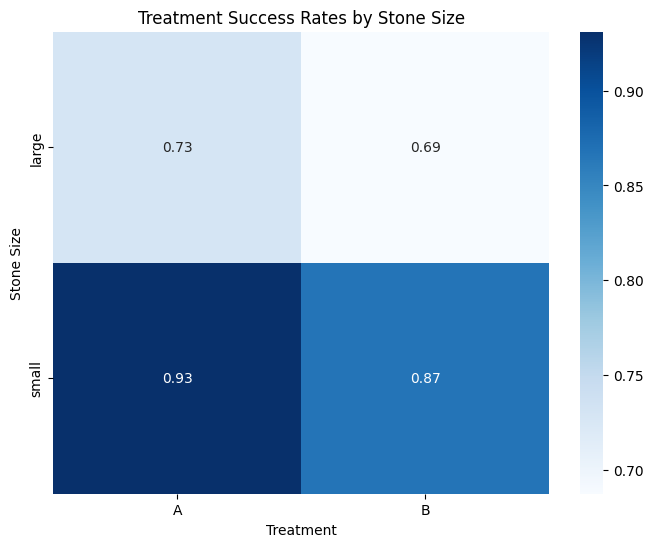

In [ ]:
pivot_table = df.pivot_table(values='success', index='stone_size', columns='treatment', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Treatment')
plt.ylabel('Stone Size')
plt.title('Treatment Success Rates by Stone Size')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("success", axis=1)
y = df["success"]

X = pd.get_dummies(X, columns=["treatment", "stone_size"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
}


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
for model_name,model in models.items():
    model.fit(X_train, y_train)
    accuracy=model.score(X_test, y_test)
    print(f"\nModel: {model_name}")
    print(f"accuracy: {accuracy:}")


Model: Random Forest
accuracy: 0.7571428571428571

Model: Logistic Regression
accuracy: 0.7571428571428571
